In [26]:
from os.path import expanduser, join
root = join(expanduser("~"), 't.ex-Graph')

In [27]:
import sys
sys.path.insert(1, join(root, 'lib'))

import config
import functions
import data
import model

In [28]:
datasets = [{
    'label': 'HTTP/S Graph (SLDs)',
    'data': data.read(join(root, 'data', 'graph-data-sld.csv'))
  }, {
    'label': 'HTTP/S Graph (FQDN)',
    'data': data.read(join(root, 'data', 'graph-data-fqdn.csv'))
  }
]

In [29]:
features = [col for col in list(datasets[0].get('data').columns) if col.lower() not in ['id', 'weight', 'tracker']]

In [30]:
from sklearn.preprocessing import LabelEncoder

for dataset in datasets:
  dataset.get('data')['tracker'] = LabelEncoder().fit_transform(dataset.get('data')['tracker'])

In [31]:
extension = []
for dataset in datasets:
  extension.append({
    'label': dataset.get('label') + ' 50/50',
    'data': data.sample_equal_distribution(dataset.get('data'), 'tracker')
  })

datasets.extend(extension)

In [32]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier

models = {
  'continuous': [
    LinearRegression(),
    RandomForestRegressor(n_estimators=20, random_state=0, n_jobs=-1)
  ],
  'category':[
    DecisionTreeClassifier(),
    LogisticRegression(solver='lbfgs', max_iter=1000)
  ]
}

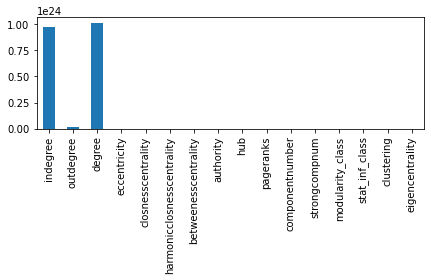

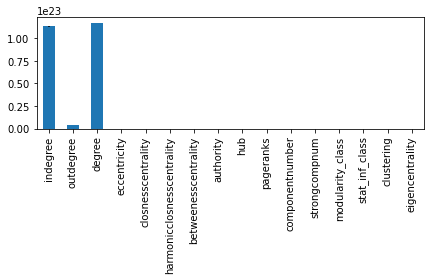

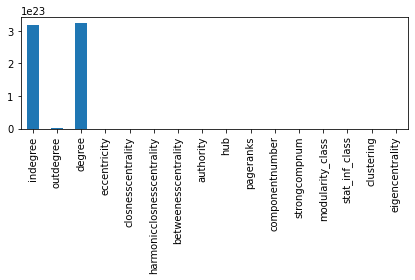

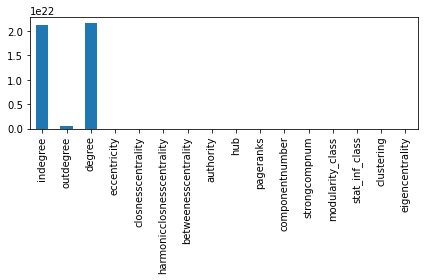

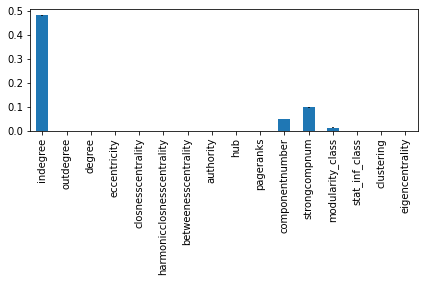

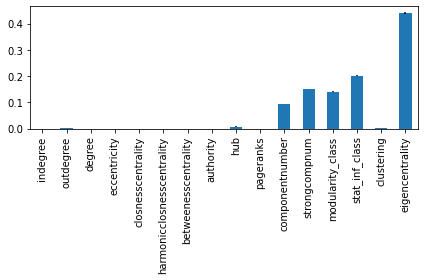

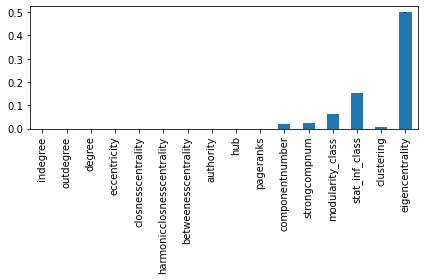

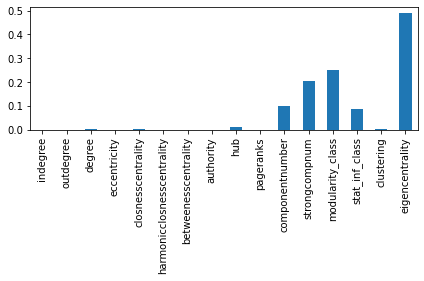

In [37]:
%matplotlib agg

results = {}

for target in ['weight', 'tracker']:
  for dataset in datasets:
    if dataset.get('label') not in results:
      results[dataset.get('label')] = dict()
      
    results[dataset.get('label')] = { **results[dataset.get('label')], **model.run_tests(models, dataset.get('data'), features, target) }

In [39]:
for key in results.keys():
  print (results.get(key).keys())

dict_keys(['LinearRegression', 'DecisionTreeClassifier'])
dict_keys(['LinearRegression', 'DecisionTreeClassifier'])
dict_keys(['LinearRegression', 'DecisionTreeClassifier'])
dict_keys(['LinearRegression', 'DecisionTreeClassifier'])
